<a href="https://colab.research.google.com/github/cameronliddle/CAForecast/blob/main/CAFifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
fifa_df =pd.read_excel("fifa.xlsx", index_col=0)
print(fifa_df.head())


                           name   rating  position   height    foot   rare  \
id                                                                           
1001             GÃ¡bor KirÃ¡ly       69        GK      191   Right      0   
100143             Frederik Boi       65         M      184   Right      0   
100264          Tomasz Szewczuk       57         A      185   Right      0   
100325   Steeve Joseph-Reinette       63         D      180    Left      0   
100326             Kamel Chafni       72         M      181   Right      0   

        pace  shooting  passing  dribbling  defending  heading  diving  \
id                                                                       
1001                                                                70   
100143    61        65       63         59         62       62           
100264    65        54       43         53         55       74           
100325    68        38       51         46         64       71           
100326   

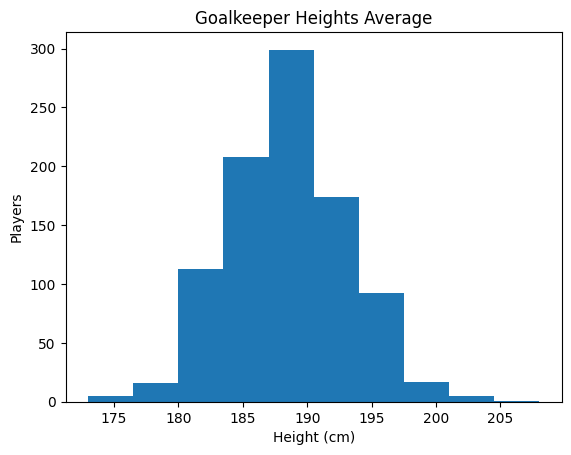

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df_gk = fifa_df[df[' position'] == ' GK']

plt.hist(df_gk[' height'], bins=10)

plt.title("Goalkeeper Heights Average")
plt.xlabel("Height (cm)")
plt.ylabel("Players")

plt.show()


In [6]:
goalkeepers = fifa_df[fifa_df[' position'] == ' GK']
average_height = goalkeepers[' height'].mean()
print("The average height of a goalkeeper is:", average_height)


The average height of a goalkeeper is: 188.23333333333332


<ipython-input-8-1248ff650acb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' height'] = pd.to_numeric(df[' height'], errors='coerce')


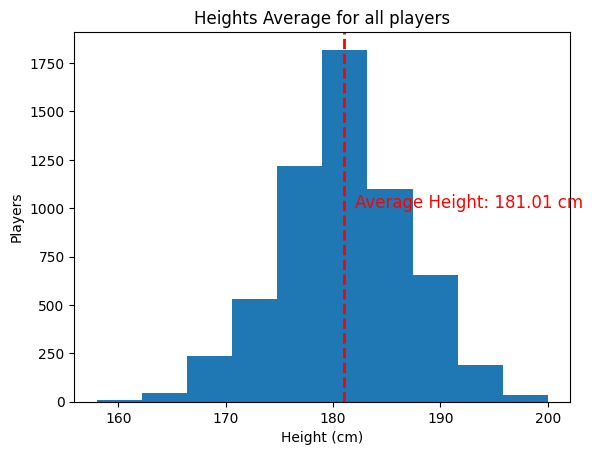

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

# Filter for midfielders, strikers, and defenders
df = fifa_df[df[' position'].isin([' M', ' S', ' D'])]

# Convert height to numeric values
df[' height'] = pd.to_numeric(df[' height'], errors='coerce')

# Calculate average height
avg_height = df[' height'].mean()

# Plot histogram of heights
plt.hist(df[' height'], bins=10)

plt.axvline(avg_height, color='red', linestyle='dashed', linewidth=2)
plt.text(avg_height + 1, 1000, f'Average Height: {round(avg_height, 2)} cm', fontsize=12, color='red')

plt.title("Heights Average for all players")
plt.xlabel("Height (cm)")
plt.ylabel("Players")

plt.show()


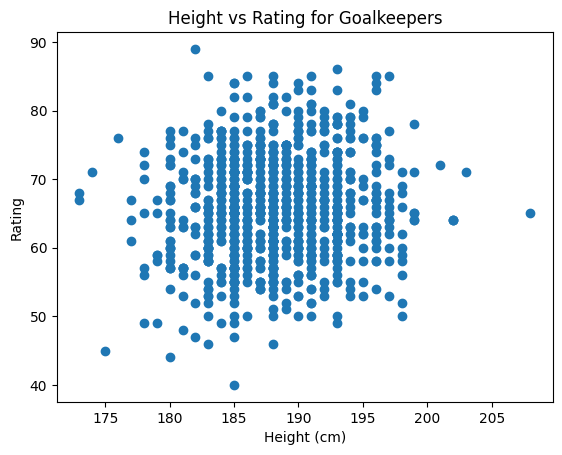

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

# Subset of data for only goalkeepers
df_gk = fifa_df[df[' position'] == ' GK']

# Create scatter plot of height vs rating for goalkeepers
plt.scatter(df_gk[' height'], df_gk[' rating'])
plt.title('Height vs Rating for Goalkeepers')
plt.xlabel('Height (cm)')
plt.ylabel('Rating')
plt.show()


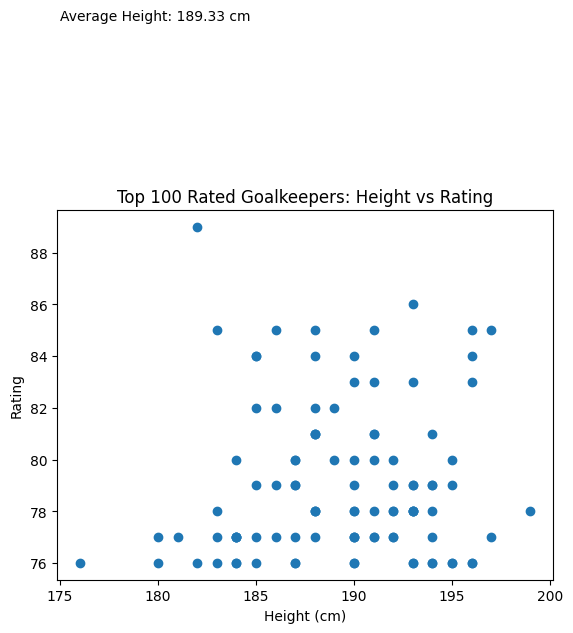

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("fifa.xlsx")

df_gk = fifa_df[df[' position'] == ' GK']

df_top_gk = df_gk.sort_values(' rating', ascending=False).head(100)

avg_height = df_top_gk[' height'].mean()

plt.scatter(df_top_gk[' height'], df_top_gk[' rating'])

plt.title("Top 100 Rated Goalkeepers: Height vs Rating")
plt.xlabel("Height (cm)")
plt.ylabel("Rating")
plt.text(175, 97, f"Average Height: {round(avg_height, 2)} cm")

# Display the plot
plt.show()



In [11]:
attributes = fifa_df[fifa_df[' position']== ' A']
attributes
average_value_A = attributes.mean()
avg_value_round_A = round (average_value_A, 1)
avg_value_round_A

<ipython-input-11-223bbbf3be65>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_value_A = attributes.mean()


id              157071.4
 rating             67.3
 height            180.9
 rare                0.5
 pace               72.5
 shooting           63.8
 passing            54.4
 dribbling          66.7
 defending          50.9
 heading            64.8
 positioning         NaN
dtype: float64

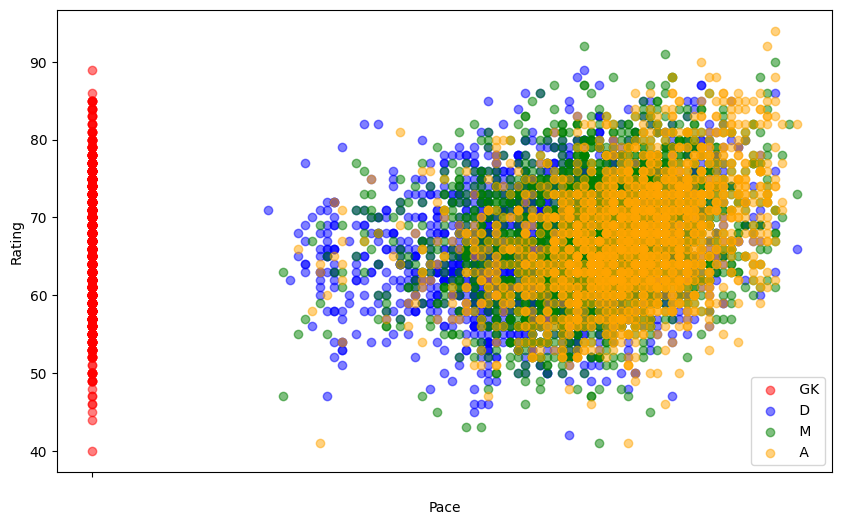

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the FIFA dataset
df = pd.read_excel("fifa.xlsx")

# Select the 'pace', 'rating', and 'position' columns
pace_rating_position_df = df[[' pace', ' rating', ' position']]

# Create a dictionary to map each position to a color
position_colors = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

# Create a scatter plot with different colors for each position
fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' pace'], data[' rating'], c=color, label=position, alpha=0.5)

# Add axis labels and a legend
ax.set_xlabel('Pace')
ax.set_ylabel('Rating')
ax.legend()

# Show the plot
plt.show()
